In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
results_dir = r'../results'
filenames = os.listdir(results_dir)
print(filenames)
df = pd.read_csv(os.path.join(results_dir, filenames[0]))
df['Log2ArraySize'] = np.log2(df['ArraySize'])
df

['results.csv', '.~lock.results.csv#']


,Threads,ArraySize,Time,Log2ArraySize
0,1,1048576,0.113522,20.0
1,1,1048576,0.114346,20.0
2,1,1048576,0.116859,20.0
3,1,2097152,0.235649,21.0
4,1,2097152,0.237011,21.0
...,...,...,...,...
391,12,536870912,55.461784,29.0
392,12,536870912,56.044752,29.0
393,12,1073741824,124.207779,30.0
394,12,1073741824,122.560992,30.0


In [3]:
grouped = df.groupby(['Threads', 'ArraySize']).agg({
    'Time': ['mean', 'std']
}).reset_index()
grouped['Log2MatrixSize'] = np.log2(grouped['ArraySize'])
grouped['Log2MatrixSize'] = grouped['Log2MatrixSize'].astype(int)
grouped.columns = ['Threads', 'ArraySize', 'MeanTime', 'StdTime', 'Log2MatrixSize']
#grouped = grouped[grouped['Log2MatrixSize'] > 4]
grouped

,Threads,ArraySize,MeanTime,StdTime,Log2MatrixSize
0,1,1048576,0.114909,0.001738,20
1,1,2097152,0.236465,0.000720,21
2,1,4194304,0.491322,0.003309,22
3,1,8388608,1.015420,0.019331,23
4,1,16777216,2.105119,0.005610,24
...,...,...,...,...,...
127,12,67108864,6.234833,0.037930,26
128,12,134217728,11.924705,0.260273,27
129,12,268435456,25.881900,1.495843,28
130,12,536870912,55.454821,0.593444,29


In [4]:
#grouped.to_csv('table.csv')

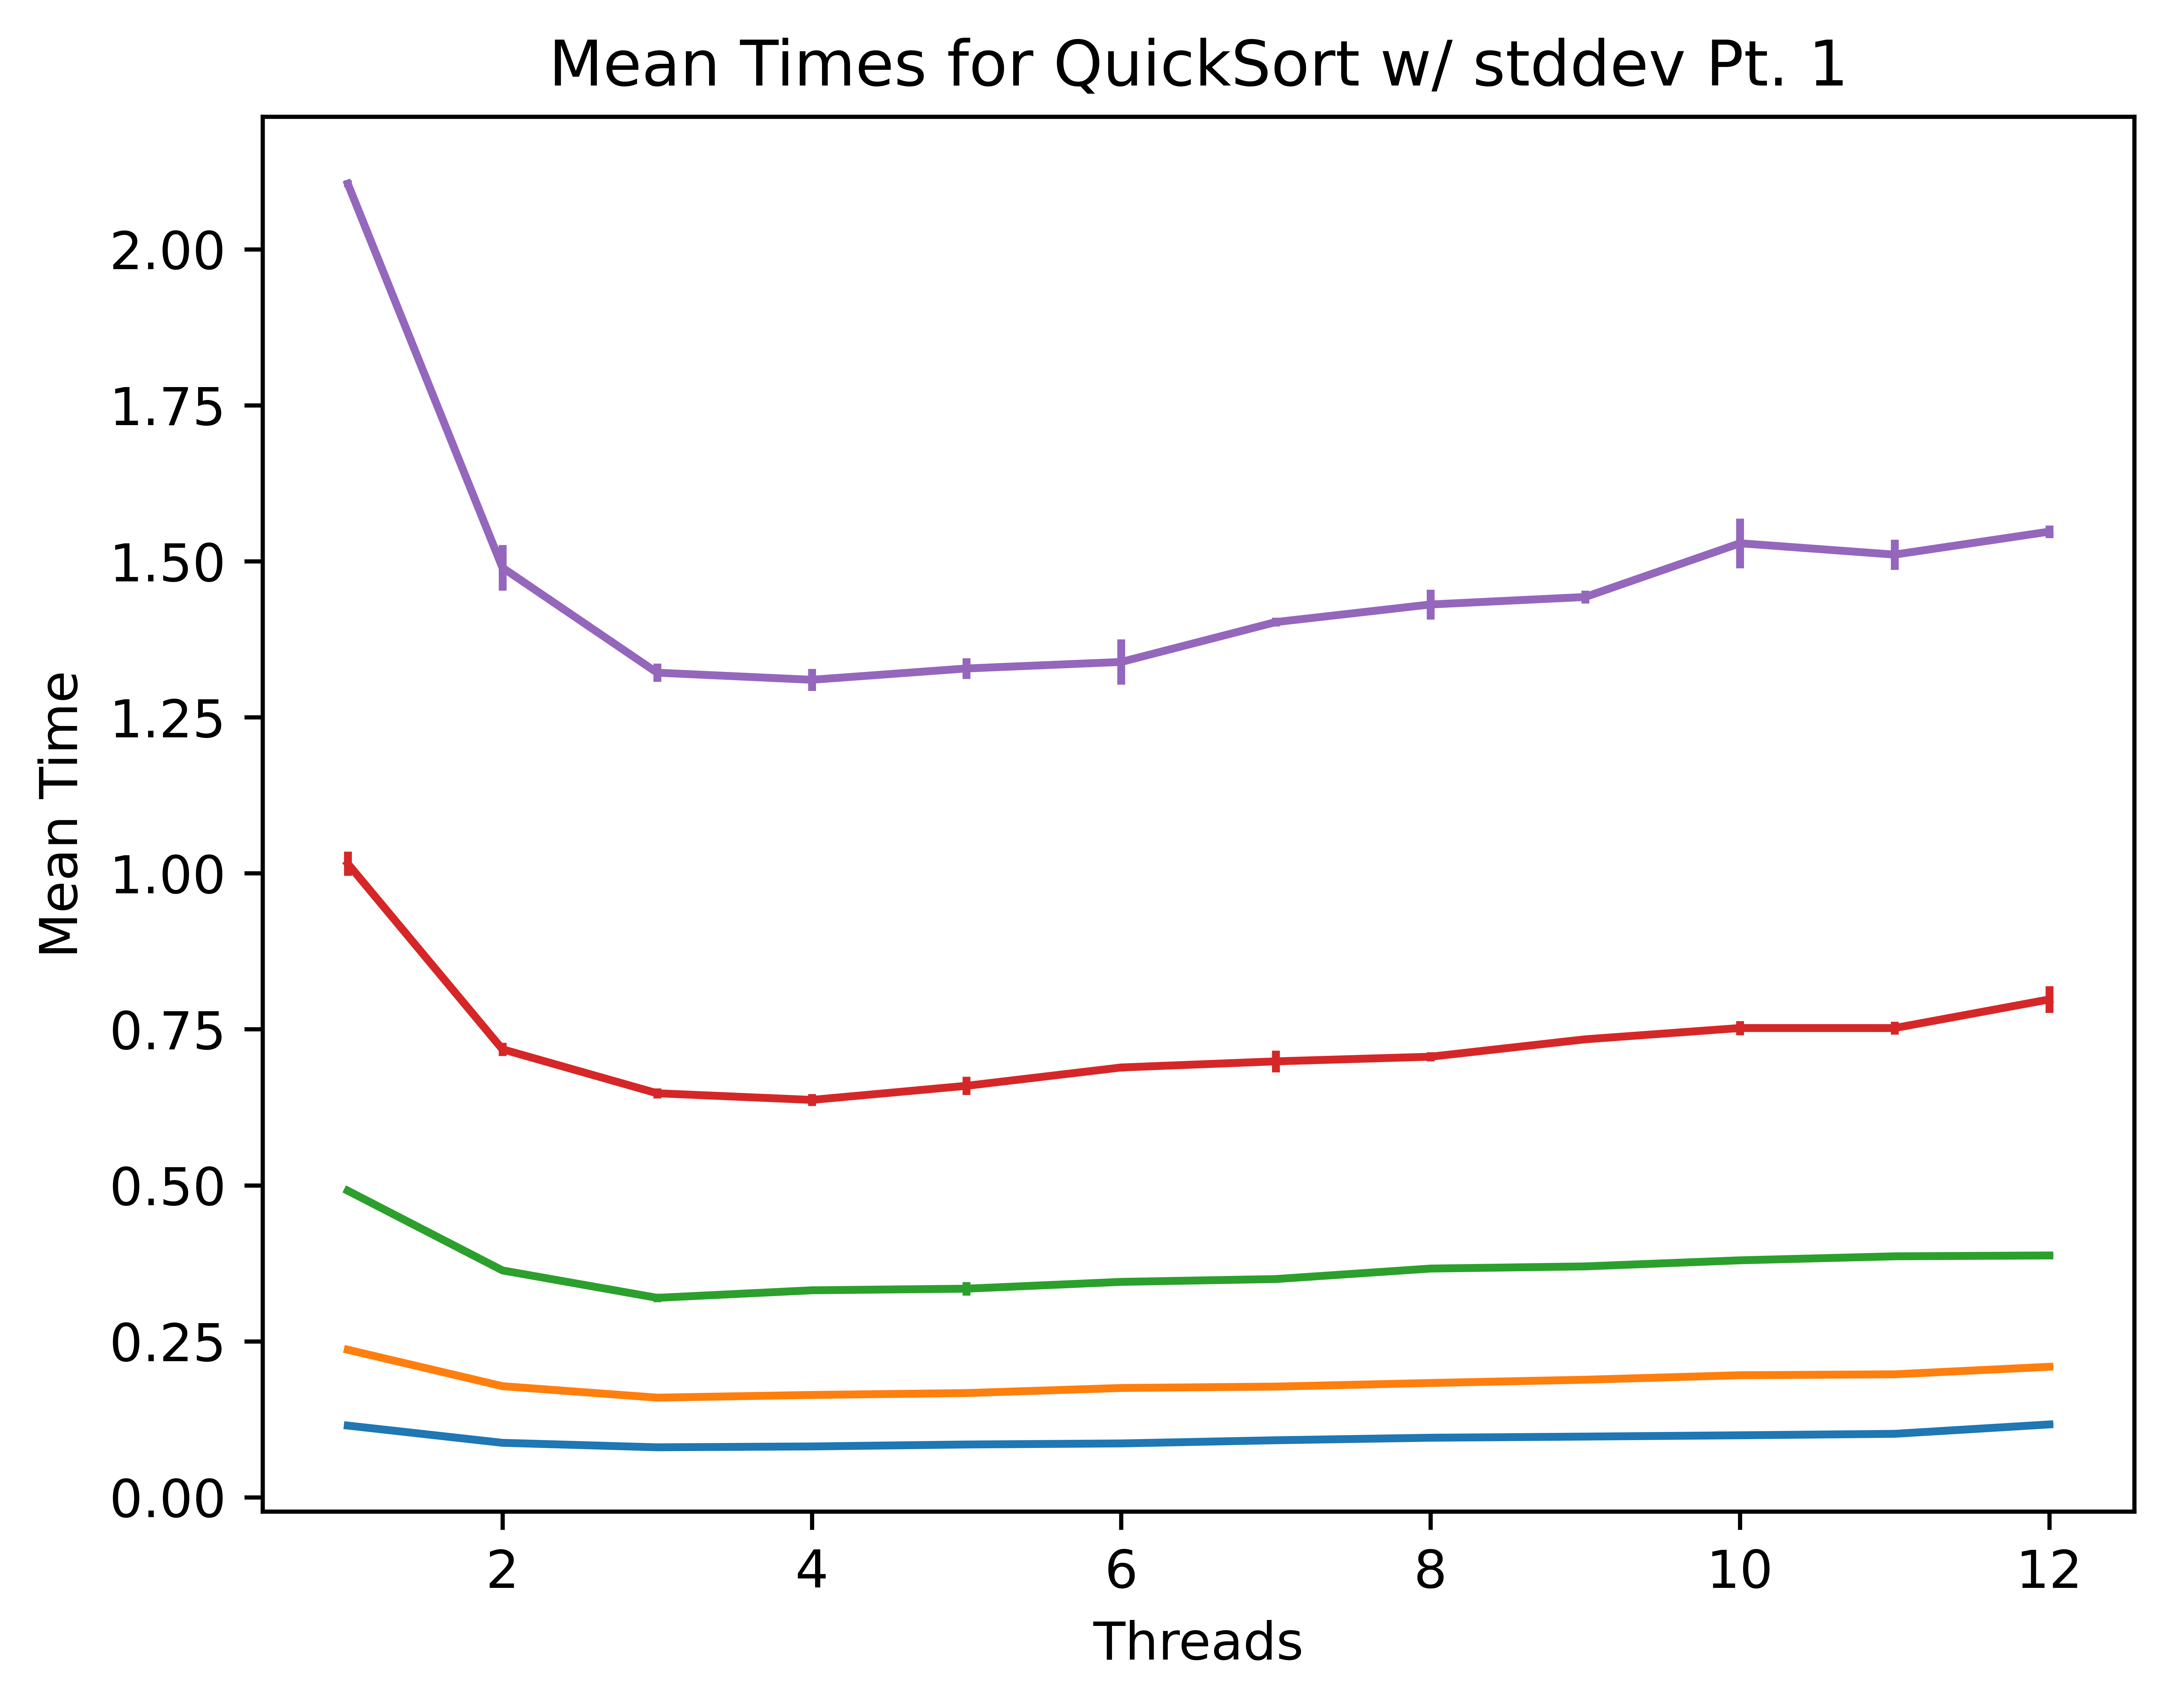

In [5]:
least = 20
most = 30
mid = (least + most) // 2
plt.figure(dpi=1200)

for i in range(least, mid):
    temp = grouped[grouped['Log2MatrixSize'] == i]
    #print(temp)
    plt.errorbar(temp['Threads'], temp['MeanTime'], yerr=temp['StdTime'], label=f"n = 2^{i}")
    plt.xlabel("Threads")
    plt.ylabel("Mean Time")

plt.title(f"Mean Times for QuickSort w/ stddev Pt. 1")
#plt.legend(loc='upper right')
#plt.savefig('results1.png')
plt.show()

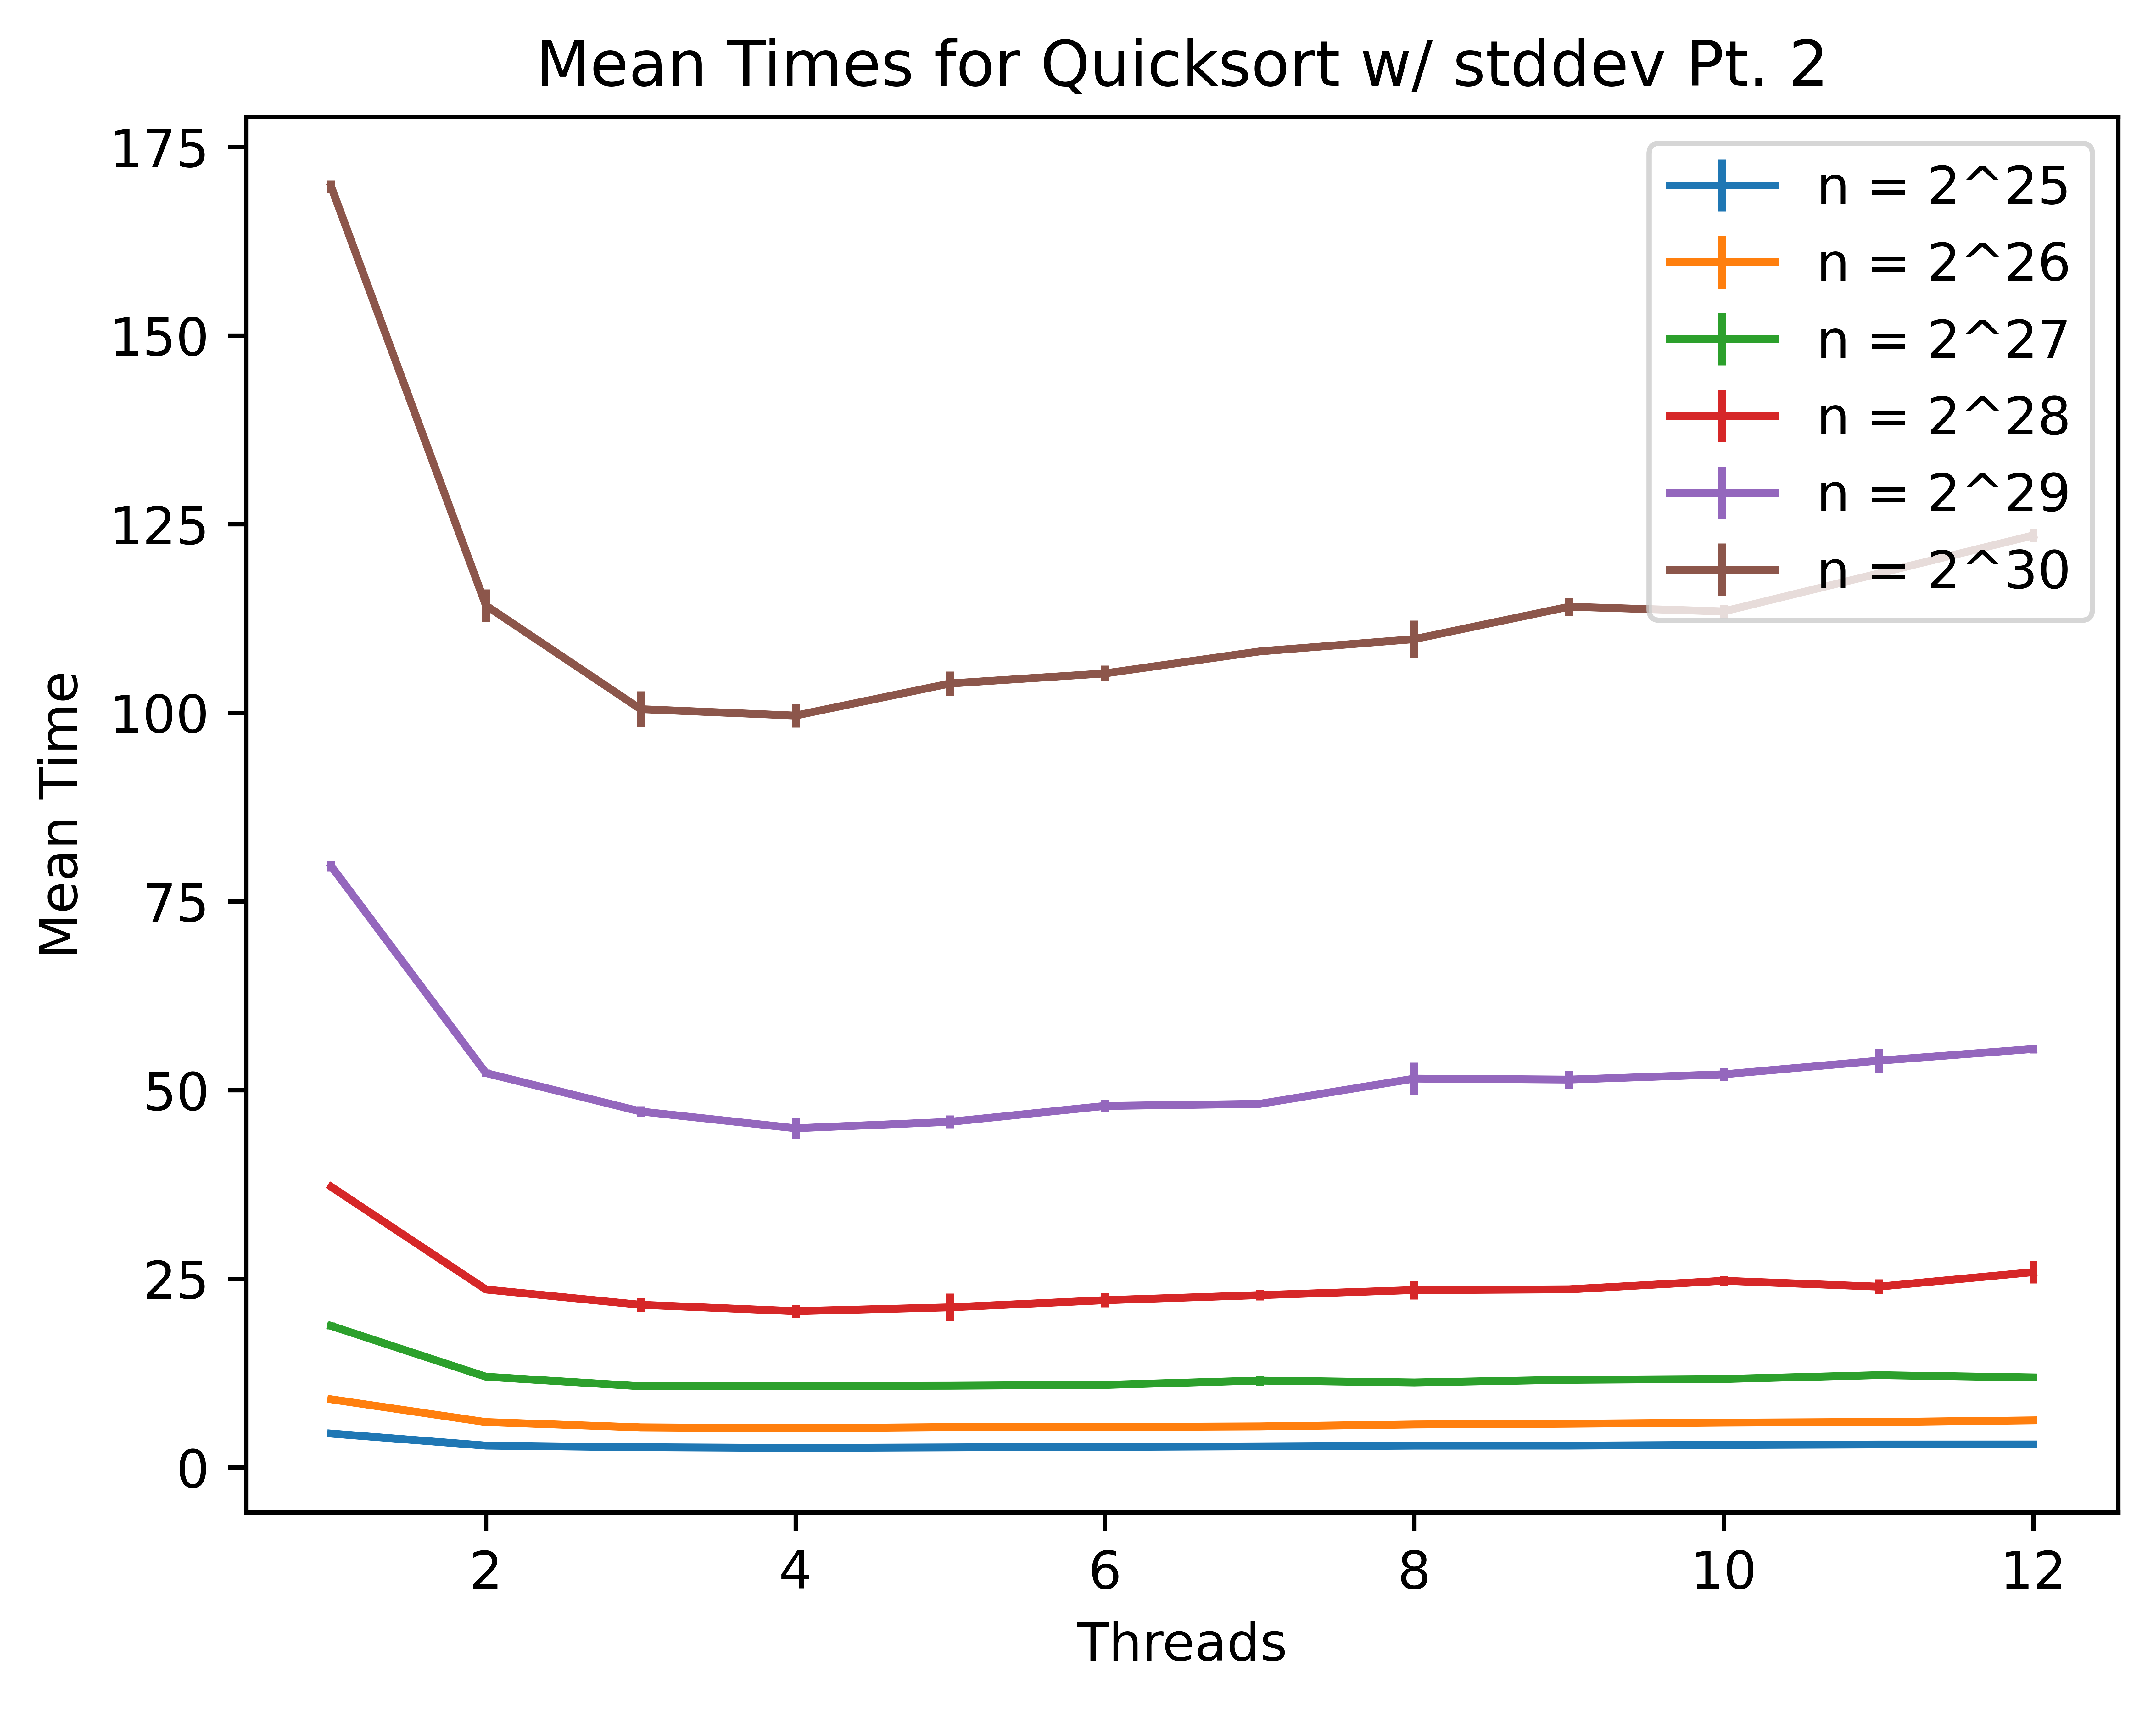

In [6]:
plt.figure(dpi=1200)

for i in range(mid, most+1):
    temp = grouped[grouped['Log2MatrixSize'] == i]
    #print(temp)
    plt.errorbar(temp['Threads'], temp['MeanTime'], yerr=temp['StdTime'], label=f"n = 2^{i}")
    plt.xlabel("Threads")
    plt.ylabel("Mean Time")
plt.title(f"Mean Times for Quicksort w/ stddev Pt. 2")
plt.legend(loc='upper right')
#plt.savefig('results2.png')
plt.show()